In [3]:
import pandas as pd
import math
import numpy as np
import time
from codecarbon import EmissionsTracker
tracker = EmissionsTracker()

[codecarbon INFO @ 02:36:53] [setup] RAM Tracking...
[codecarbon INFO @ 02:36:53] [setup] GPU Tracking...
[codecarbon INFO @ 02:36:53] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 02:36:53] [setup] CPU Tracking...
[codecarbon WARNING @ 02:36:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 02:36:55] We saw that you have a Intel(R) Xeon(R) CPU @ 2.30GHz but we don't know it. Please contact us.
[codecarbon INFO @ 02:36:55] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 02:36:55] >>> Tracker's metadata:
[codecarbon INFO @ 02:36:55]   Platform system: Linux-5.15.120+-x86_64-with-glibc2.35
[codecarbon INFO @ 02:36:55]   Python version: 3.10.12
[codecarbon INFO @ 02:36:55]   CodeCarbon version: 2.3.1
[codecarbon INFO @ 02:36:55]   Available RAM : 12.678 GB
[codecarbon INFO @ 02:36:55]   CPU count: 2
[codecarbon INFO @ 02:36:55]   CPU model: Intel(R) Xeon(R) CPU @ 2.30GHz
[codecarbon INFO @ 02:36:55]   GPU

In [5]:
from Bloom_filter import BloomFilter
import PLBF
import disjoint_Ada_BF
import learned_Bloom_filter

In [ ]:
##CPU used only
##learned_Bloom_filter from https://github.com/DAIZHENWEI/Ada-BF
%%time
tracker.start()
DATA_PATH = 'datasets/URL_data.csv'
min_thres = 0.5
max_thres = 0.9
R_sum = 200000
data = pd.read_csv(DATA_PATH)
negative_sample = data.loc[(data['label']==-1)]
positive_sample = data.loc[(data['label']==1)]
train_negative = negative_sample.sample(frac = 0.3)
'''Stage 1: Find the hyper-parameters (spare 30% samples to find the parameters)'''
bloom_filter_opt, thres_opt = learned_Bloom_filter.Find_Optimal_Parameters(max_thres, min_thres, R_sum, train_negative, positive_sample)
'''Stage 2: Run Ada-BF on all the samples'''
### Test URLs
ML_positive = negative_sample.loc[(negative_sample['score'] > thres_opt), 'url']
bloom_negative = negative_sample.loc[(negative_sample['score'] <= thres_opt), 'url']
score_negative = negative_sample.loc[(negative_sample['score'] < thres_opt), 'score']
BF_positive = bloom_filter_opt.test(bloom_negative, single_key = False)
FP_items = sum(BF_positive) + len(ML_positive)
print('False positive items: %d' % FP_items)
tracker.stop()



[codecarbon WARNING @ 06:08:42] Already started tracking


Threshold: 0.500000, False positive items: 3647
Threshold: 0.510000, False positive items: 3569


[codecarbon INFO @ 06:08:49] Energy consumed for RAM : 0.000079 kWh. RAM Power : 4.7543792724609375 W
[codecarbon INFO @ 06:08:49] Energy consumed for all CPUs : 0.000709 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 06:08:49] 0.000788 kWh of electricity used since the beginning.


Threshold: 0.520000, False positive items: 3528
Threshold: 0.530000, False positive items: 3502
Threshold: 0.540000, False positive items: 3492
Threshold: 0.550000, False positive items: 3378
Threshold: 0.560000, False positive items: 3418
Threshold: 0.570000, False positive items: 3338
Threshold: 0.580000, False positive items: 3453
Threshold: 0.590000, False positive items: 3541


[codecarbon INFO @ 06:09:04] Energy consumed for RAM : 0.000099 kWh. RAM Power : 4.7543792724609375 W
[codecarbon INFO @ 06:09:04] Energy consumed for all CPUs : 0.000886 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 06:09:04] 0.000985 kWh of electricity used since the beginning.


Threshold: 0.600000, False positive items: 3607
Threshold: 0.610000, False positive items: 3605
Threshold: 0.620000, False positive items: 3676
Threshold: 0.630000, False positive items: 3665
Threshold: 0.640000, False positive items: 3777
Threshold: 0.650000, False positive items: 3808
Threshold: 0.660000, False positive items: 3940
Threshold: 0.670000, False positive items: 4087
Threshold: 0.680000, False positive items: 4183


[codecarbon INFO @ 06:09:19] Energy consumed for RAM : 0.000119 kWh. RAM Power : 4.7543792724609375 W
[codecarbon INFO @ 06:09:19] Energy consumed for all CPUs : 0.001063 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 06:09:19] 0.001182 kWh of electricity used since the beginning.


Threshold: 0.690000, False positive items: 4526
Threshold: 0.700000, False positive items: 4571
Threshold: 0.710000, False positive items: 4801
Threshold: 0.720000, False positive items: 4894
Threshold: 0.730000, False positive items: 5148
Threshold: 0.740000, False positive items: 5311
Threshold: 0.750000, False positive items: 5578
Threshold: 0.760000, False positive items: 5765
Threshold: 0.770000, False positive items: 6006
Threshold: 0.780000, False positive items: 6148
Threshold: 0.790000, False positive items: 6290


[codecarbon INFO @ 06:09:34] Energy consumed for RAM : 0.000139 kWh. RAM Power : 4.7543792724609375 W
[codecarbon INFO @ 06:09:34] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 06:09:34] 0.001378 kWh of electricity used since the beginning.


Threshold: 0.800000, False positive items: 6748
Threshold: 0.810000, False positive items: 7255
Threshold: 0.820000, False positive items: 7552
Threshold: 0.830000, False positive items: 7986
Threshold: 0.840000, False positive items: 8075
Threshold: 0.850000, False positive items: 8157
Threshold: 0.860000, False positive items: 8664
Threshold: 0.870000, False positive items: 8921
Threshold: 0.880000, False positive items: 9173
Threshold: 0.890000, False positive items: 9666
Threshold: 0.900000, False positive items: 10068


[codecarbon INFO @ 06:09:49] Energy consumed for RAM : 0.000158 kWh. RAM Power : 4.7543792724609375 W
[codecarbon INFO @ 06:09:49] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 06:09:49] 0.001575 kWh of electricity used since the beginning.
[codecarbon INFO @ 06:09:52] Energy consumed for RAM : 0.000163 kWh. RAM Power : 4.7543792724609375 W
[codecarbon INFO @ 06:09:52] Energy consumed for all CPUs : 0.001456 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 06:09:52] 0.001619 kWh of electricity used since the beginning.


False positive items: 11224
CPU times: user 1min 9s, sys: 171 ms, total: 1min 9s
Wall time: 1min 10s


0.0005654121567420516

In [6]:
## use T4 gpu
##learned_Bloom_filter from https://github.com/DAIZHENWEI/Ada-BF
%%time
tracker.start()
DATA_PATH = 'datasets/URL_data.csv'
min_thres = 0.5
max_thres = 0.9
R_sum = 200000
data = pd.read_csv(DATA_PATH)
negative_sample = data.loc[(data['label']==-1)]
positive_sample = data.loc[(data['label']==1)]
train_negative = negative_sample.sample(frac = 0.3)
'''Stage 1: Find the hyper-parameters (spare 30% samples to find the parameters)'''
bloom_filter_opt, thres_opt = learned_Bloom_filter.Find_Optimal_Parameters(max_thres, min_thres, R_sum, train_negative, positive_sample)
'''Stage 2: Run Ada-BF on all the samples'''
### Test URLs
ML_positive = negative_sample.loc[(negative_sample['score'] > thres_opt), 'url']
bloom_negative = negative_sample.loc[(negative_sample['score'] <= thres_opt), 'url']
score_negative = negative_sample.loc[(negative_sample['score'] < thres_opt), 'score']
BF_positive = bloom_filter_opt.test(bloom_negative, single_key = False)
FP_items = sum(BF_positive) + len(ML_positive)
print('False positive items: %d' % FP_items)
tracker.stop()

Threshold: 0.500000, False positive items: 3522
Threshold: 0.510000, False positive items: 3486
Threshold: 0.520000, False positive items: 3481
Threshold: 0.530000, False positive items: 3396
Threshold: 0.540000, False positive items: 3420
Threshold: 0.550000, False positive items: 3348
Threshold: 0.560000, False positive items: 3333
Threshold: 0.570000, False positive items: 3309


[codecarbon INFO @ 02:40:52] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.7543792724609375 W
[codecarbon INFO @ 02:40:52] Energy consumed for all GPUs : 0.000042 kWh. Total GPU Power : 10.013048763859759 W
[codecarbon INFO @ 02:40:52] Energy consumed for all CPUs : 0.000178 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:40:52] 0.000240 kWh of electricity used since the beginning.


Threshold: 0.580000, False positive items: 3415
Threshold: 0.590000, False positive items: 3508
Threshold: 0.600000, False positive items: 3498
Threshold: 0.610000, False positive items: 3617
Threshold: 0.620000, False positive items: 3613
Threshold: 0.630000, False positive items: 3649
Threshold: 0.640000, False positive items: 3828
Threshold: 0.650000, False positive items: 3911
Threshold: 0.660000, False positive items: 3739


[codecarbon INFO @ 02:41:07] Energy consumed for RAM : 0.000040 kWh. RAM Power : 4.7543792724609375 W
[codecarbon INFO @ 02:41:07] Energy consumed for all GPUs : 0.000084 kWh. Total GPU Power : 10.028825117184551 W
[codecarbon INFO @ 02:41:07] Energy consumed for all CPUs : 0.000355 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:41:07] 0.000478 kWh of electricity used since the beginning.


Threshold: 0.670000, False positive items: 3951
Threshold: 0.680000, False positive items: 4090
Threshold: 0.690000, False positive items: 4433
Threshold: 0.700000, False positive items: 4581
Threshold: 0.710000, False positive items: 4922
Threshold: 0.720000, False positive items: 4892
Threshold: 0.730000, False positive items: 5110
Threshold: 0.740000, False positive items: 5246
Threshold: 0.750000, False positive items: 5471
Threshold: 0.760000, False positive items: 5755
Threshold: 0.770000, False positive items: 5741


[codecarbon INFO @ 02:41:22] Energy consumed for RAM : 0.000059 kWh. RAM Power : 4.7543792724609375 W
[codecarbon INFO @ 02:41:22] Energy consumed for all GPUs : 0.000125 kWh. Total GPU Power : 9.948972837062906 W
[codecarbon INFO @ 02:41:22] Energy consumed for all CPUs : 0.000532 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:41:22] 0.000716 kWh of electricity used since the beginning.


Threshold: 0.780000, False positive items: 6432
Threshold: 0.790000, False positive items: 6320
Threshold: 0.800000, False positive items: 6641
Threshold: 0.810000, False positive items: 7312
Threshold: 0.820000, False positive items: 7567
Threshold: 0.830000, False positive items: 7813
Threshold: 0.840000, False positive items: 8077
Threshold: 0.850000, False positive items: 8151
Threshold: 0.860000, False positive items: 8560
Threshold: 0.870000, False positive items: 8882
Threshold: 0.880000, False positive items: 9236
Threshold: 0.890000, False positive items: 9590
Threshold: 0.900000, False positive items: 9972


[codecarbon INFO @ 02:41:37] Energy consumed for RAM : 0.000079 kWh. RAM Power : 4.7543792724609375 W
[codecarbon INFO @ 02:41:37] Energy consumed for all GPUs : 0.000167 kWh. Total GPU Power : 9.995001873276879 W
[codecarbon INFO @ 02:41:37] Energy consumed for all CPUs : 0.000710 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:41:37] 0.000955 kWh of electricity used since the beginning.
[codecarbon INFO @ 02:41:41] Energy consumed for RAM : 0.000084 kWh. RAM Power : 4.7543792724609375 W
[codecarbon INFO @ 02:41:41] Energy consumed for all GPUs : 0.000177 kWh. Total GPU Power : 9.911023924639984 W
[codecarbon INFO @ 02:41:41] Energy consumed for all CPUs : 0.000755 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:41:41] 0.001016 kWh of electricity used since the beginning.


False positive items: 11313
CPU times: user 1min 3s, sys: 241 ms, total: 1min 3s
Wall time: 1min 3s


0.0004598825082539998

In [ ]:
##disjoint_Ada-BF from https://github.com/DAIZHENWEI/Ada-BF
%%time
tracker.start()
DATA_PATH = 'datasets/URL_data.csv'
num_group_min = 8
num_group_max = 12
R_sum = 200000
c_min = 1.8
c_max = 2.1
data = pd.read_csv(DATA_PATH)
negative_sample = data.loc[(data['label']==-1)]
positive_sample = data.loc[(data['label']==1)]
train_negative = negative_sample.sample(frac = 0.3)
'''Stage 1: Find the hyper-parameters'''
Bloom_Filters_opt, thresholds_opt, non_empty_ix_opt = disjoint_Ada_BF.Find_Optimal_Parameters(c_min, c_max, num_group_min, num_group_max, R_sum, train_negative, positive_sample)
'''Stage 2: Run Ada-BF on all the samples'''
### Test URLs
ML_positive = negative_sample.loc[(negative_sample['score'] >= thresholds_opt[-2]), 'url']
url_negative = negative_sample.loc[(negative_sample['score'] < thresholds_opt[-2]), 'url']
score_negative = negative_sample.loc[(negative_sample['score'] < thresholds_opt[-2]), 'score']
test_result = np.zeros(len(url_negative))
ss = 0
for score_s, url_s in zip(score_negative, url_negative):
        ix = min(np.where(score_s < thresholds_opt)[0]) - 1
        if ix >= non_empty_ix_opt:
            test_result[ss] = Bloom_Filters_opt[ix].test(url_s)
        else:
            test_result[ss] = 0
        ss += 1
FP_items = sum(test_result) + len(ML_positive)
FPR = FP_items/len(url_negative)
print('False positive items: {}; FPR: {}; Size of quries: {}'.format(FP_items, FPR, len(url_negative)))
tracker.stop()

[codecarbon WARNING @ 06:26:35] Already started tracking


False positive items: 2010, Number of groups: 8, c = 1.800000
False positive items: 1988, Number of groups: 8, c = 1.900000
False positive items: 2080, Number of groups: 8, c = 2.000000
False positive items: 2060, Number of groups: 8, c = 2.100000
False positive items: 1908, Number of groups: 9, c = 1.800000
False positive items: 1878, Number of groups: 9, c = 1.900000
False positive items: 1941, Number of groups: 9, c = 2.000000
False positive items: 2087, Number of groups: 9, c = 2.100000
False positive items: 1939, Number of groups: 10, c = 1.800000
False positive items: 1958, Number of groups: 10, c = 1.900000
False positive items: 1905, Number of groups: 10, c = 2.000000
False positive items: 1942, Number of groups: 10, c = 2.100000
False positive items: 1936, Number of groups: 11, c = 1.800000
False positive items: 1893, Number of groups: 11, c = 1.900000
False positive items: 1912, Number of groups: 11, c = 2.000000
False positive items: 2023, Number of groups: 11, c = 2.100000


[codecarbon WARNING @ 06:27:51] Tracker already stopped !
[codecarbon WARNING @ 06:27:51] Background scheduler didn't run for a long period (1078s), results might be inaccurate
[codecarbon INFO @ 06:27:51] Energy consumed for RAM : 0.001588 kWh. RAM Power : 4.7543792724609375 W
[codecarbon INFO @ 06:27:51] Energy consumed for all CPUs : 0.014192 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 06:27:51] 0.015779 kWh of electricity used since the beginning.


False positive items: 6517.0; FPR: 0.01895490611257184; Size of quries: 343816
CPU times: user 1min 15s, sys: 184 ms, total: 1min 15s
Wall time: 1min 16s


0.005510582065832374

In [ ]:
## Bloom_filter from https://github.com/DAIZHENWEI/Ada-BF
%%time
tracker.start()
DATA_PATH = 'datasets/URL_data.csv'
data = pd.read_csv(DATA_PATH)
negative_sample = data.loc[(data['label'] == -1)]
positive_sample = data.loc[(data['label'] == 1)]
url = positive_sample['url']
n = len(url)
R_sum = 200000
bloom_filter = BloomFilter(n, R_sum)
bloom_filter.insert(url)
url_negative = negative_sample['url']
n1 = bloom_filter.test(url_negative, single_key=False)
print('False positive items: ', sum(n1))
tracker.stop()

[codecarbon WARNING @ 07:33:44] Already started tracking
[codecarbon WARNING @ 07:33:48] Tracker already stopped !
[codecarbon WARNING @ 07:33:48] Background scheduler didn't run for a long period (3956s), results might be inaccurate
[codecarbon INFO @ 07:33:48] Energy consumed for RAM : 0.006813 kWh. RAM Power : 4.7543792724609375 W
[codecarbon INFO @ 07:33:48] Energy consumed for all CPUs : 0.060903 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:33:48] 0.067716 kWh of electricity used since the beginning.


False positive items:  81654.0
CPU times: user 4.07 s, sys: 56.3 ms, total: 4.12 s
Wall time: 4.19 s


0.023648303217209996

In [9]:
def do_bloom_filter(data_path, R_sum):
  data = pd.read_csv(data_path)
  negative_sample = data.loc[(data['label'] == -1)]
  positive_sample = data.loc[(data['label'] == 1)]
  url = positive_sample['url']
  n = len(url)
  bloom_filter = BloomFilter(n, R_sum)
  bloom_filter.insert(url)
  url_negative = negative_sample['url']
  n1 = bloom_filter.test(url_negative, single_key=False)
  print('False positive items: ', sum(n1))


def do_disjoint_Ada_BF(data_path, num_group_min, num_group_max, c_min, c_max, R_sum):
  data = pd.read_csv(data_path)
  negative_sample = data.loc[(data['label']==-1)]
  positive_sample = data.loc[(data['label']==1)]
  train_negative = negative_sample.sample(frac = 0.3)
  '''Stage 1: Find the hyper-parameters'''
  Bloom_Filters_opt, thresholds_opt, non_empty_ix_opt = disjoint_Ada_BF.Find_Optimal_Parameters(c_min, c_max, num_group_min, num_group_max, R_sum, train_negative, positive_sample)
  '''Stage 2: Run Ada-BF on all the samples'''
  ### Test URLs
  ML_positive = negative_sample.loc[(negative_sample['score'] >= thresholds_opt[-2]), 'url']
  url_negative = negative_sample.loc[(negative_sample['score'] < thresholds_opt[-2]), 'url']
  score_negative = negative_sample.loc[(negative_sample['score'] < thresholds_opt[-2]), 'score']
  test_result = np.zeros(len(url_negative))
  ss = 0
  for score_s, url_s in zip(score_negative, url_negative):
        ix = min(np.where(score_s < thresholds_opt)[0]) - 1
        if ix >= non_empty_ix_opt:
            test_result[ss] = Bloom_Filters_opt[ix].test(url_s)
        else:
            test_result[ss] = 0
        ss += 1
  FP_items = sum(test_result) + len(ML_positive)
  FPR = FP_items/len(url_negative)
  print('False positive items: {}; FPR: {}; Size of quries: {}'.format(FP_items, FPR, len(url_negative)))

def do_learned_bf(data_path, min_thres,max_thres,R_sum):
  data = pd.read_csv(data_path)
  negative_sample = data.loc[(data['label']==-1)]
  positive_sample = data.loc[(data['label']==1)]
  train_negative = negative_sample.sample(frac = 0.3)
  '''Stage 1: Find the hyper-parameters (spare 30% samples to find the parameters)'''
  bloom_filter_opt, thres_opt = learned_Bloom_filter.Find_Optimal_Parameters(max_thres, min_thres, R_sum, train_negative, positive_sample)
  '''Stage 2: Run Ada-BF on all the samples'''
  ### Test URLs
  ML_positive = negative_sample.loc[(negative_sample['score'] > thres_opt), 'url']
  bloom_negative = negative_sample.loc[(negative_sample['score'] <= thres_opt), 'url']
  score_negative = negative_sample.loc[(negative_sample['score'] < thres_opt), 'score']
  BF_positive = bloom_filter_opt.test(bloom_negative, single_key = False)
  FP_items = sum(BF_positive) + len(ML_positive)
  print('False positive items: %d' % FP_items)

  ## all are edited from https://github.com/DAIZHENWEI/Ada-BF

In [7]:
def simus(func,num_runs=100):
    times = np.zeros(num_runs)
    electricity = np.zeros(num_runs)

    for i in range(num_runs):
        tracker = EmissionsTracker()
        start_time = time.time()
        tracker.start()
        result = func
        energy_consumed = tracker.stop()
        end_time = time.time()
        times[i]=end_time - start_time
        electricity[i]=energy_consumed
    return pd.DataFrame({'time' : times, 'electricity' : electricity, 'power':electricity/times})

In [ ]:
%%capture
def ad(n):
   1+n

df1 = simus(ad(1), num_runs=2)

In [ ]:
df1

,time,electricity,power
0,0.013619,5.465486e-09,4.013149e-07
1,0.013144,5.474000e-09,4.164784e-07


In [10]:
%%capture
n=200
df_bl=simus(do_bloom_filter('datasets/URL_data.csv', 200000),n)
df_ada=simus(do_disjoint_Ada_BF('datasets/URL_data.csv',
                                8, 12, 1.8, 2.1, 200000),n)
df_lbf=simus(do_learned_bf('datasets/URL_data.csv', 0.5,0.9,200000),n)

In [11]:
df_bl['method']='bloom_filter'
df_ada['method']='disjoint_Ada_BF'
df_lbf['method']='learned_bf'

In [12]:
df_all=pd.concat([df_bl, df_ada,df_lbf], ignore_index=True)
df_all.head()

,time,electricity,power,method
0,0.013768,3.809221e-08,0.000003,bloom_filter
1,0.015283,1.697138e-07,0.000011,bloom_filter
2,0.014129,4.002099e-08,0.000003,bloom_filter
3,0.029902,4.117396e-08,0.000001,bloom_filter
4,0.059650,2.343006e-07,0.000004,bloom_filter


In [13]:
df_all.to_csv('emissions_data_method_gpu.csv', index=False)

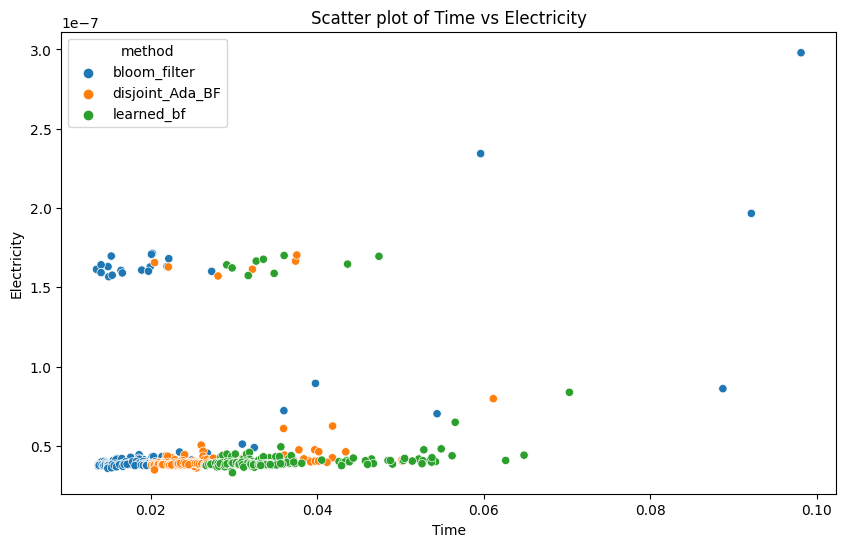

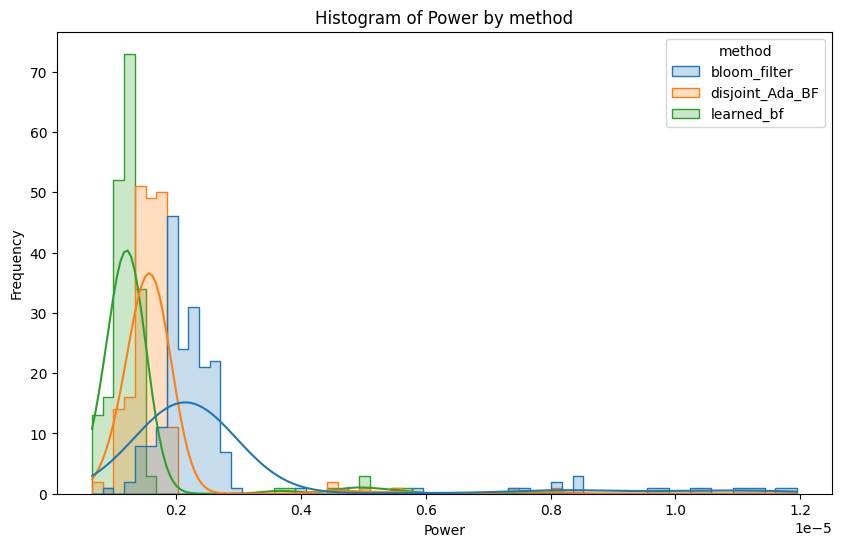

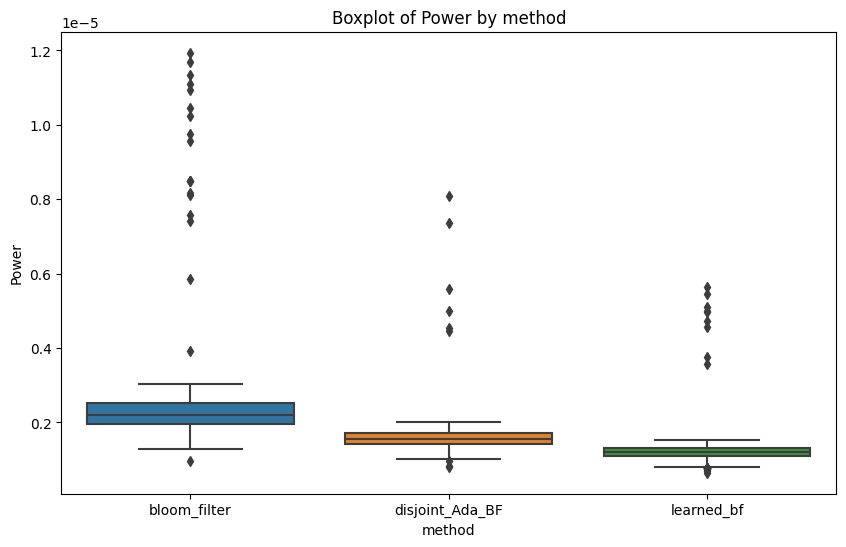

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_all, x='time', y='electricity', hue='method')
plt.title('Scatter plot of Time vs Electricity')
plt.xlabel('Time')
plt.ylabel('Electricity')
plt.legend(title='method')
plt.show()

# Histograms of power
plt.figure(figsize=(10, 6))
sns.histplot(data=df_all, x='power', hue='method', element="step", kde=True)
plt.title('Histogram of Power by method')
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.show()

# Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_all, x='method', y='power')
plt.title('Boxplot of Power by method')
plt.xlabel('method')
plt.ylabel('Power')
plt.show()